In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

- step through top 10k words
- query the complete series
- bootstrap
- get largest zscore from expected
- sort, plot

In [4]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [5]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples / series.sum()

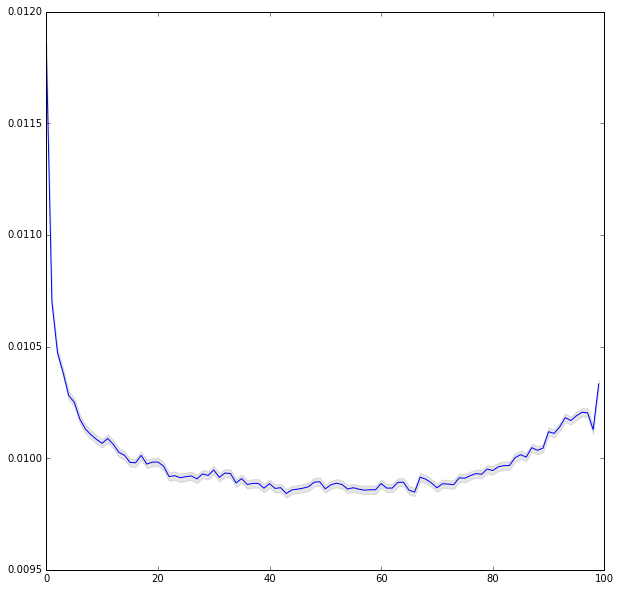

In [6]:
series = Token.token_series('the')

bs = bootstrap(series)

plt.figure(figsize=(10,10))

plt.plot(bs.mean(0))

plt.fill_between(
    range(100),
    bs.mean(0) + 2*bs.std(0),
    bs.mean(0) - 2*bs.std(0),
    color='black',
    alpha=0.1,
)

plt.show()

In [7]:
import numpy as np

zscores = np.array([
    abs(m-1/100)/std
    for m, std in zip(bs.mean(0), bs.std(0))
])

zscores.max()

188.32833612695114

# Rankings

In [8]:
def max_zscore(token):
    
    series = Token.token_series(token)

    bs = bootstrap(series)
    
    zscores = np.array([
        abs(m-1/100)/std
        for m, std in zip(bs.mean(0), bs.std(0))
        if m > 0
    ])

    return zscores.mean()

In [9]:
data = [
    (token, count, max_zscore(token))
    for token, count in tokens.items()
]

In [10]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'zscore'))

df.sort_values('zscore', ascending=False, inplace=True)

In [11]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,zscore
11,you,21824060,21.810850
4,a,45188898,21.732642
5,i,32831159,18.549907
153,young,1539567,14.293184
29,me,8684913,14.013874
0,the,112517604,13.905781
3,of,51317715,13.482665
25,him,10397590,13.408530
206,years,1177206,12.841237
581,school,341948,12.222647


In [12]:
def plot_bootstrap(token):
    
    series = Token.token_series(token)

    bs = bootstrap(series)

    plt.figure(figsize=(3,3))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )

    print(token)
    plt.show()

you


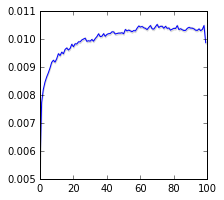

a


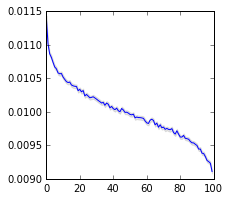

i


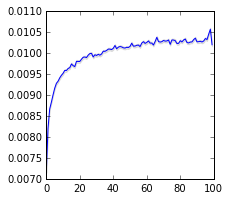

young


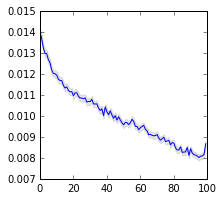

me


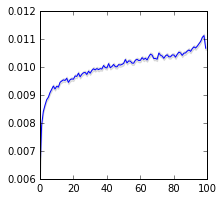

the


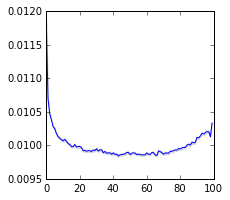

of


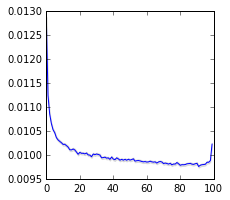

him


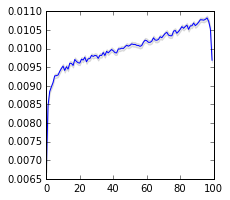

years


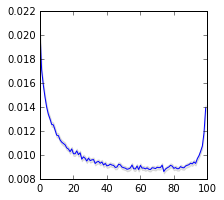

school


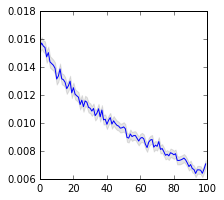

to


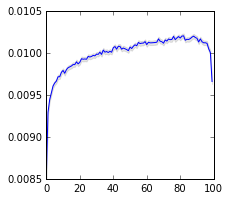

xix


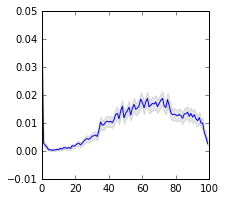

love


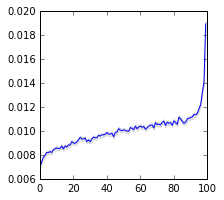

will


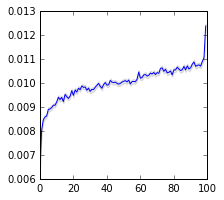

said


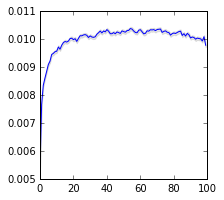

iii


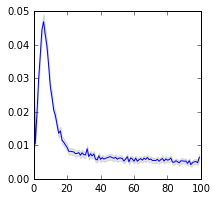

he


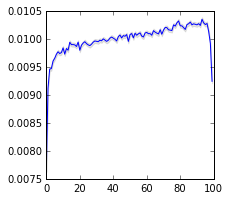

xx


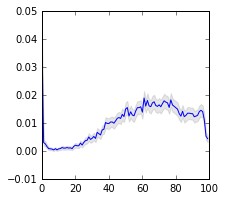

she


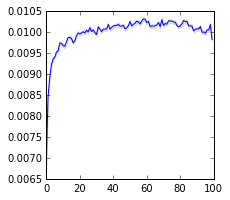

xviii


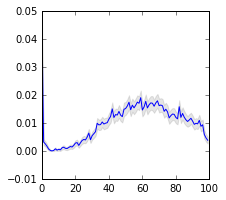

father


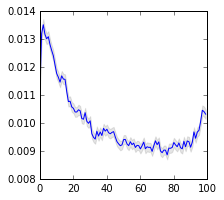

mother


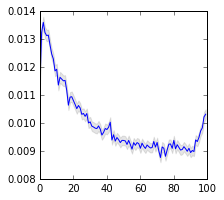

do


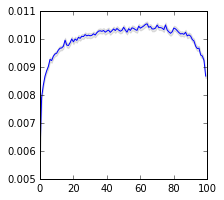

that


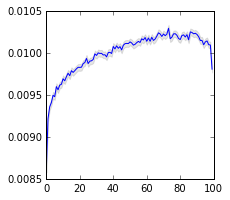

what


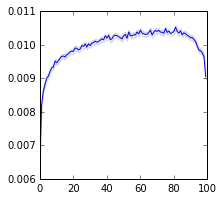

now


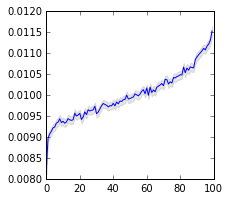

not


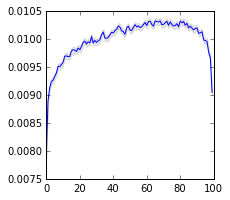

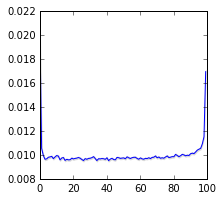

have


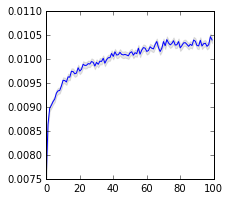

it


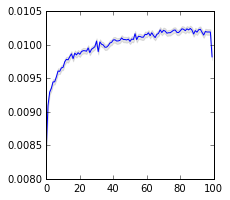

hair


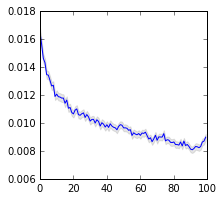

death


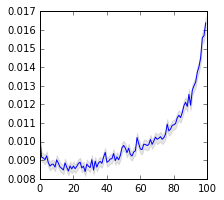

xvii


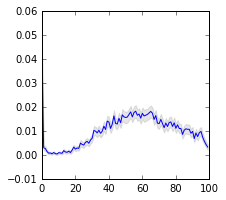

viii


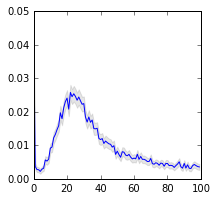

god


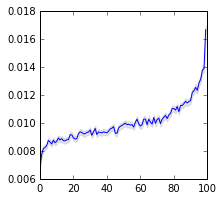

vii


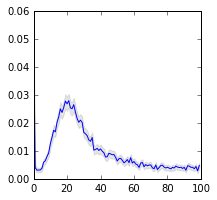

iv


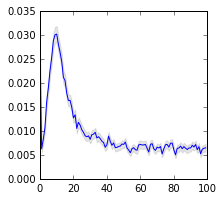

we


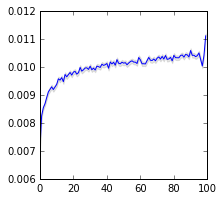

girls


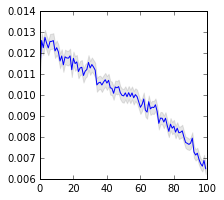

ix


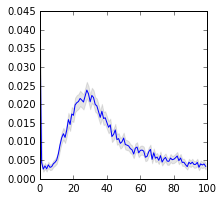

boy


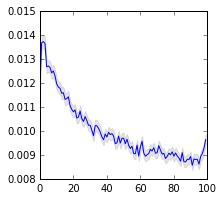

xii


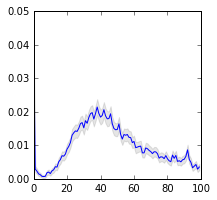

age


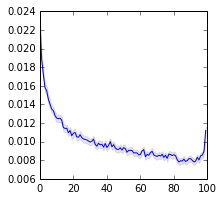

miss


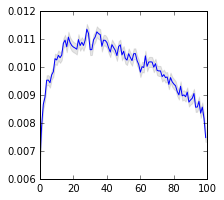

if


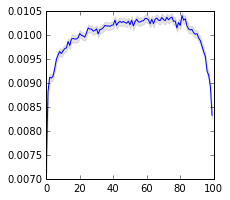

an


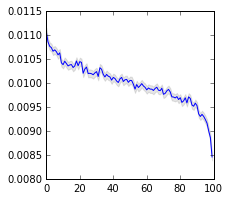

tall


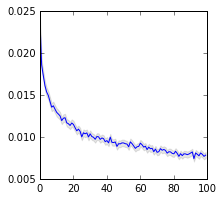

again


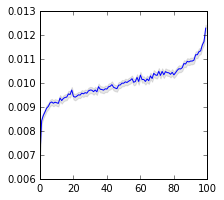

dead


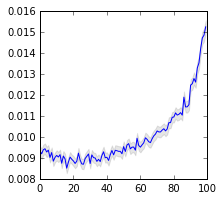

xiii


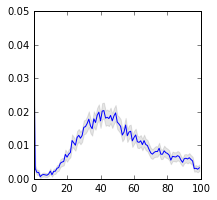

girl


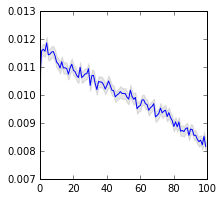

letter


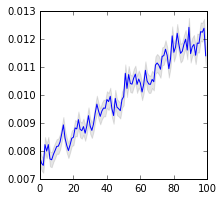

told


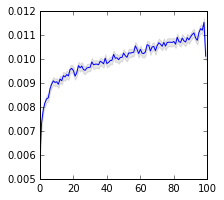

old


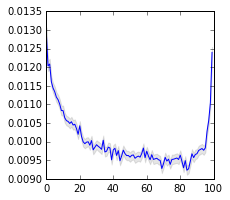

xi


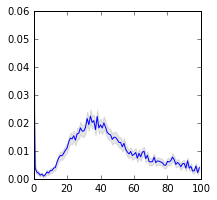

xvi


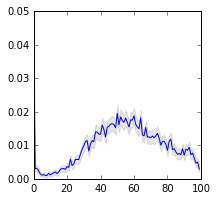

think


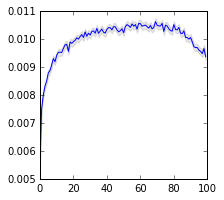

know


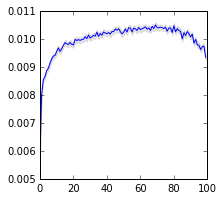

college


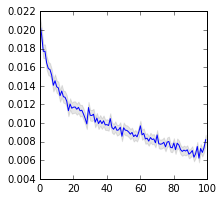

vi


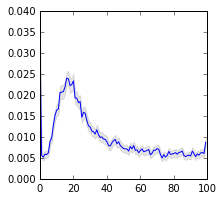

dont


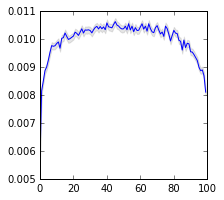

can


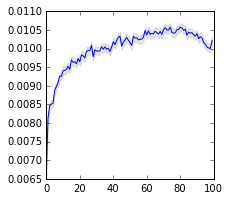

kill


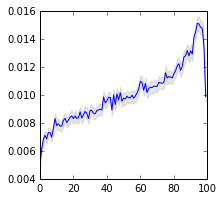

and


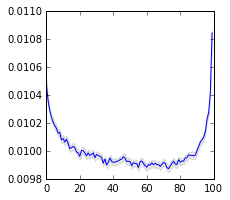

year


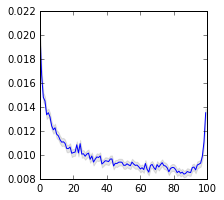

family


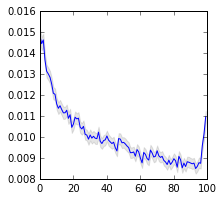

tell


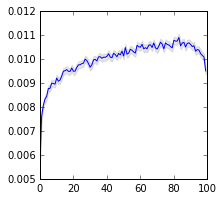

heart


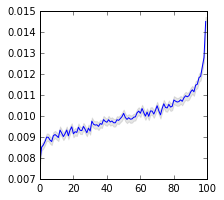

small


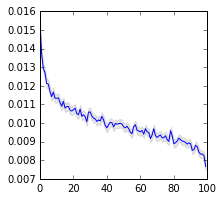

large


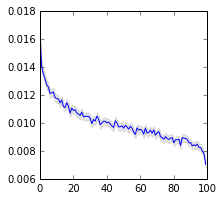

xiv


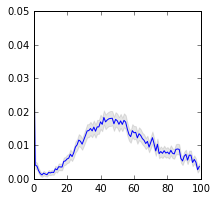

or


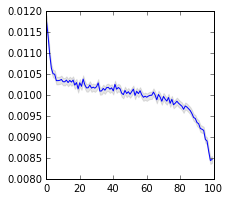

boys


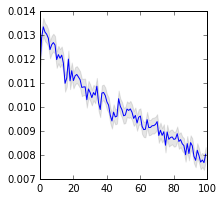

always


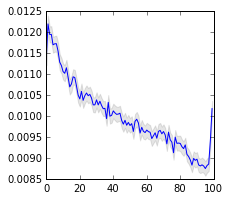

could


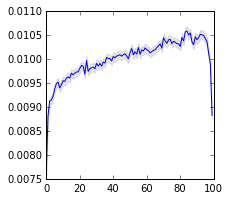

like


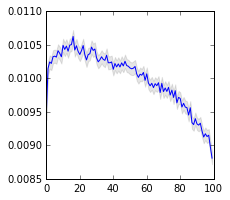

blue


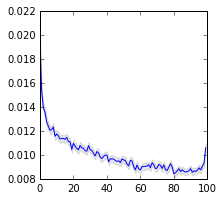

your


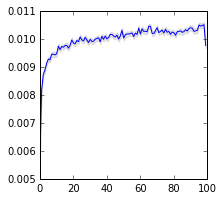

would


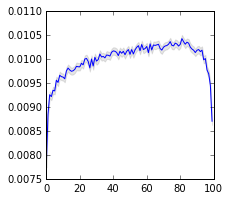

killed


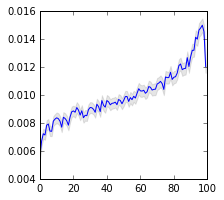

life


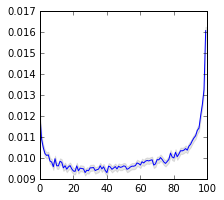

brown


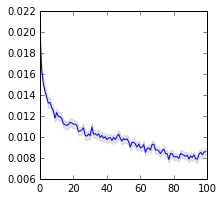

xv


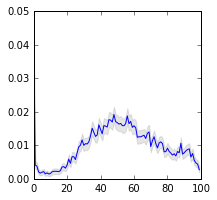

forgive


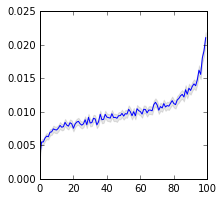

books


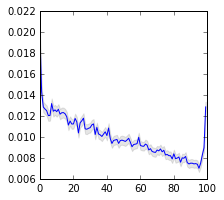

little


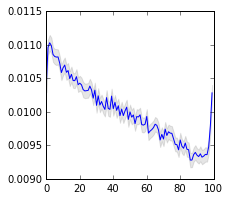

his


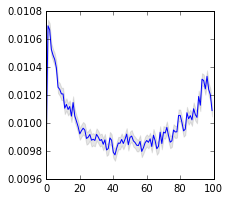

prisoner


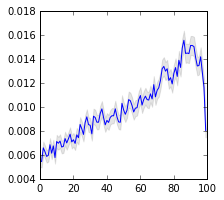

die


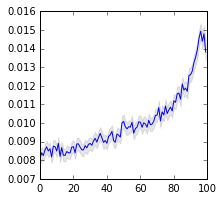

has


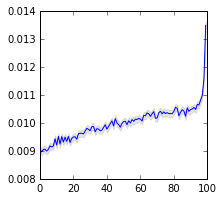

happiness


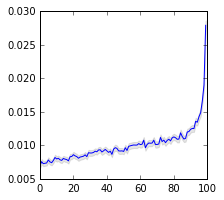

joy


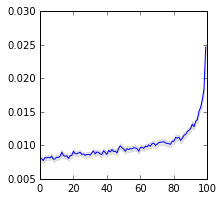

ii


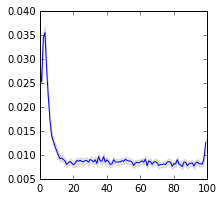

back


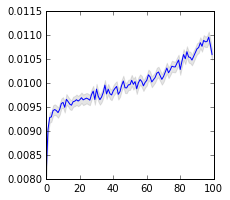

about


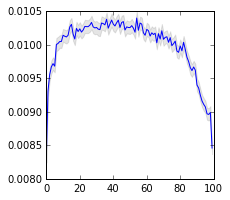

gun


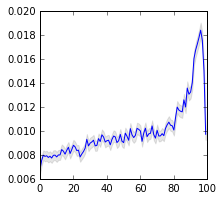

handsome


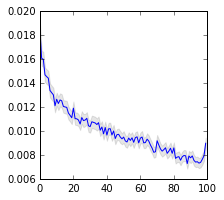

loved


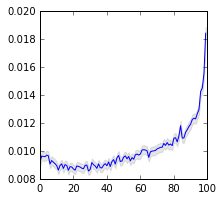

pretty


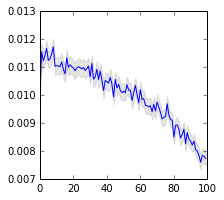

go


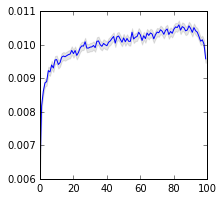

In [13]:
for i, (token, count, zscore) in df.head(100).iterrows():
    plot_bootstrap(token)